In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
 # Reflect Database into ORM classes
Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

<AxesSubplot:xlabel='Date'>

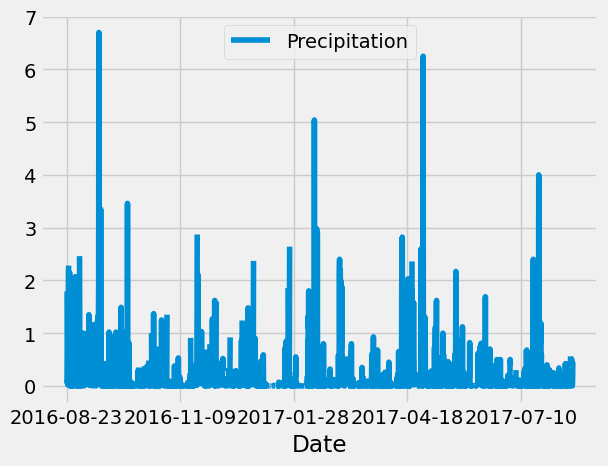

In [10]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year form the last date in the data set. 
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation score
precipitation_data = []
precipitation_data  = session.query(Measurement.date, Measurement.prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year)
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year).all()

df = pd.DataFrame(precipitation_data, columns=['Date','Precipitation'])
df.set_index(df['Date'], inplace=True)
df = df.sort_index()

# Plot in matplotlib bar chart
df.plot()

In [11]:
# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days= 365)
str(one_year)

'2016-08-23'

In [12]:
# Perform a query to retrieve the data and precipitation scores
precipitation_df = pd.DataFrame(precipitation_data).set_index('date')
precipitation_df = precipitation_df.sort_values(by='date').dropna()
precipitation_df.head()


,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation_data, columns=['Date','Precipitation'])
df.set_index(df['Date'], inplace=True)

In [14]:
# Sort the dataframe by date
df = df.sort_index()

<function matplotlib.pyplot.show(close=None, block=None)>

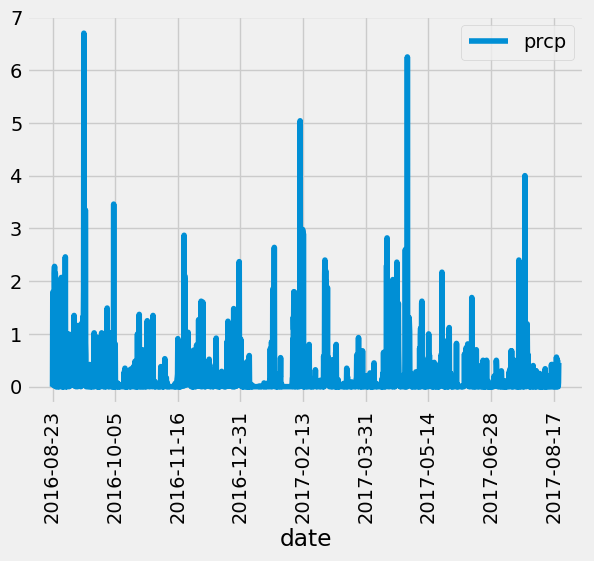

In [15]:
## Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot = 90)
plt.show

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station).distinct().count()
total_stations
      

9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
            filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

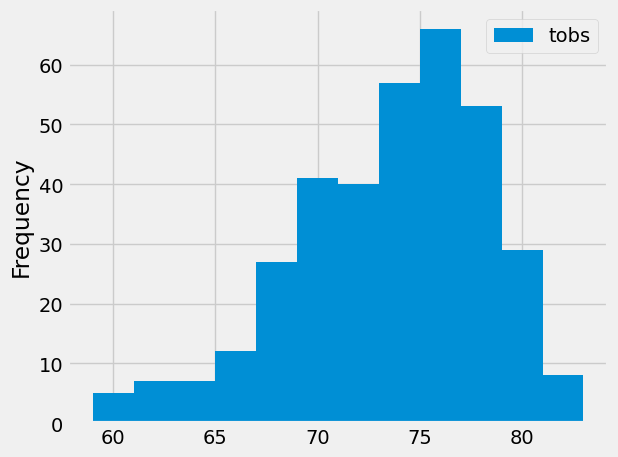

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date>=one_year)
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

# Close session

In [21]:
# Close Session
session.close()